In [1]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.

from typing import Optional

import networkx as nx
from gym.spaces import Space, Dict

In [2]:
class BaseGraph(Space):
    _nx_class: type

    def __init__(
            self,
            max_num_nodes: int,
            node_property_space: Optional[Dict] = None,
            edge_property_space: Optional[Dict] = None):

        self.max_num_nodes = max_num_nodes
        self.node_property_space = Dict() if node_property_space is None else node_property_space
        self.edge_property_space = Dict() if edge_property_space is None else edge_property_space
        super().__init__()

    def sample(self):
        num_nodes = self.np_random.randint(self.max_num_nodes + 1)
        graph = self._nx_class()

        # add nodes with properties
        for node_id in range(num_nodes):
            node_properties = {k: s.sample() for k, s in self.node_property_space.spaces.items()}
            graph.add_node(node_id, **node_properties)

        if num_nodes < 2:
            return graph

        # add some edges with properties
        seen, unseen = [], list(range(num_nodes))  # init
        self.__pop_random(unseen, seen)            # pop one node before we start
        while unseen:
            node_id_from, node_id_to = self.__sample_random(seen), self.__pop_random(unseen, seen)
            edge_properties = {k: s.sample() for k, s in self.edge_property_space.spaces.items()}
            graph.add_edge(node_id_from, node_id_to, **edge_properties)

        return graph

    def __pop_random(self, unseen: list, seen: list):
        i = self.np_random.choice(len(unseen))
        x = unseen[i]
        seen.append(x)
        del unseen[i]
        return x

    def __sample_random(self, seen: list):
        i = self.np_random.choice(len(seen))
        return seen[i]

    def contains(self, x):
        return (
            isinstance(x, self._nx_class)
            and all(node_property in self.node_property_space for node_property in x.nodes.values())
            and all(edge_property in self.edge_property_space for edge_property in x.edges.values())
        )

In [3]:
class Graph(BaseGraph):
    _nx_class = nx.Graph


class DiGraph(BaseGraph):
    _nx_class = nx.DiGraph


class MultiGraph(BaseGraph):
    _nx_class = nx.MultiGraph


class MultiDiGraph(BaseGraph):
    _nx_class = nx.MultiDiGraph

node_id: 0, node_properties: {'category': 3, 'vector': array([0.6869173 , 0.15533979, 0.18836698], dtype=float32)}
node_id: 1, node_properties: {'category': 4, 'vector': array([0.4672987 , 0.0702199 , 0.30582362], dtype=float32)}
node_id: 2, node_properties: {'category': 3, 'vector': array([0.8839947 , 0.30991745, 0.5264154 ], dtype=float32)}
node_id: 3, node_properties: {'category': 0, 'vector': array([0.1819519 , 0.8920517 , 0.13049679], dtype=float32)}
node_id: 4, node_properties: {'category': 5, 'vector': array([0.84655565, 0.05630443, 0.4880125 ], dtype=float32)}
node_id: 5, node_properties: {'category': 0, 'vector': array([0.18665385, 0.2943176 , 0.21457005], dtype=float32)}
node_id: 6, node_properties: {'category': 1, 'vector': array([0.71690077, 0.43400764, 0.9297842 ], dtype=float32)}
node_id: 7, node_properties: {'category': 1, 'vector': array([0.73777115, 0.95701617, 0.08256838], dtype=float32)}
node_id: 8, node_properties: {'category': 3, 'vector': array([0.3465563 , 0.2824

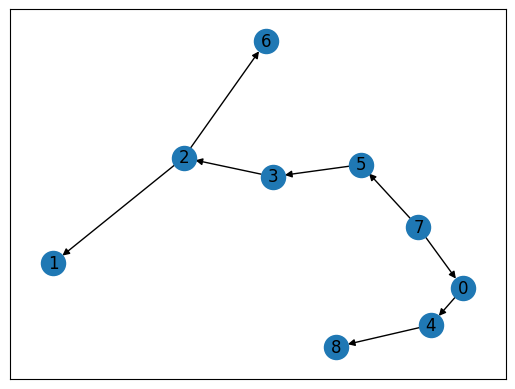

In [17]:
if __name__ == '__main__':
    from gym.spaces import Box, Discrete
    import matplotlib.pyplot as plt  # type:ignore

    space = DiGraph(
        max_num_nodes=10,
        node_property_space=Dict({'vector': Box(0, 1, (3,)), 'category': Discrete(7)}),
        edge_property_space=Dict({'weight': Box(0, 1, ())}))

    space.seed(42)
    graph = space.sample()
    assert graph in space

    for node_id, node_properties in graph.nodes.items():
        print(f"node_id: {node_id}, node_properties: {node_properties}")

    for (node_id_from, node_id_to), edge_properties in graph.edges.items():
        print(f"node_id_from: {node_id_from}, node_id_to: {node_id_to}, "
              f"edge_properties: {edge_properties}")

    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph, pos)
    nx.draw_networkx_edges(graph, pos)
    nx.draw_networkx_labels(graph, pos)
    # nx.draw_networkx_labels(graph, pos, graph.nodes)
    plt.show()